In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import sys
sys.path.insert(0, '../')
from utils import *


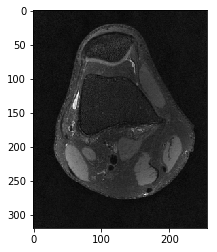

c:\users\jains\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


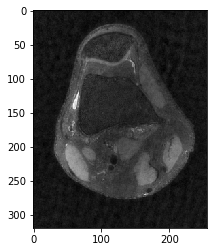

In [2]:
# original vs 2 times subsampled
data = glob("../data/test_img_slices/*.ra")
orig_img = get_image_old2(data[0])
minv = np.min(orig_img[:, :, 0])
maxv = np.max(orig_img[:, :, 0])
orig_img = np.expand_dims(-1 + (2 * (np.array(orig_img[:, :, 0] - minv) / (maxv - minv))), 2)
plt.imshow(orig_img[:, :, 0], cmap='gray')
plt.show()
mask_files = glob("../masks/gen_masks/2_*")
mask_files = [np.fft.fftshift(np.load(m)) for m in mask_files]
mask = mask_files[0]
subs_img = np.fft.ifft2(np.multiply(np.fft.fft2(orig_img[:, :, 0]), mask)).astype(float)
minv = np.min(subs_img)
maxv = np.max(subs_img)
subs_img = np.expand_dims(-1 + (2 * (np.array(subs_img - minv) / (maxv - minv))), 2)
plt.imshow(subs_img[:, :, 0], cmap='gray')
plt.show()

In [3]:
def get_best_L2(all_ims, compare):
    min_mse, best = np.float('inf'), all_ims[0]
    best_index = 0
    for index in range(1, len(all_ims)):
        img = all_ims[index]
        mse = np.mean(np.square(img[:, :, 0] - compare[:, :, 0]))
        if mse < min_mse:
            min_mse = mse
            best = img
            best_index = index
    best_index -= 1 # bc first index in images is the noise
    #print(best_index, min_mse)
    return best, best_index

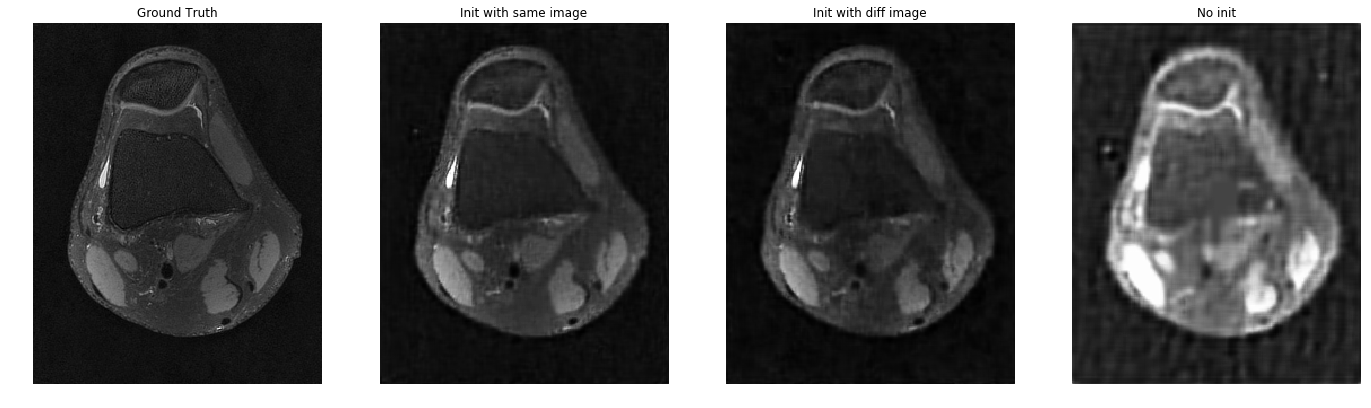

L1 errors:  [0.049729671919179354, 0.04008332969181707, 0.05922931807454335]
L2 errors:  [0.005133766992617467, 0.0034833669695894633, 0.007522650359963147]


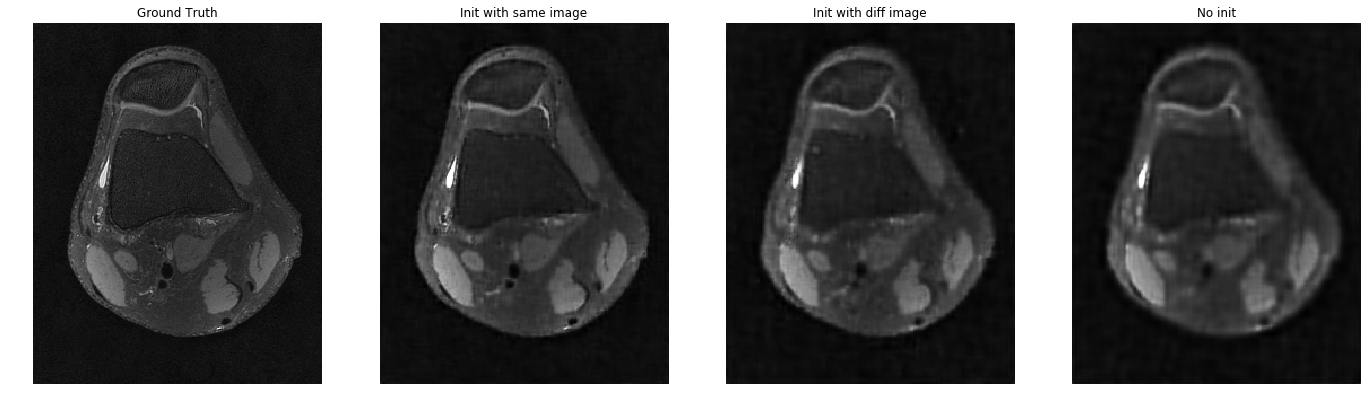

L1 errors:  [0.04950747099473459, 0.05372328087757676, 0.05225505717701201]
L2 errors:  [0.004883899324870442, 0.0057911557073805535, 0.0060056656925155175]


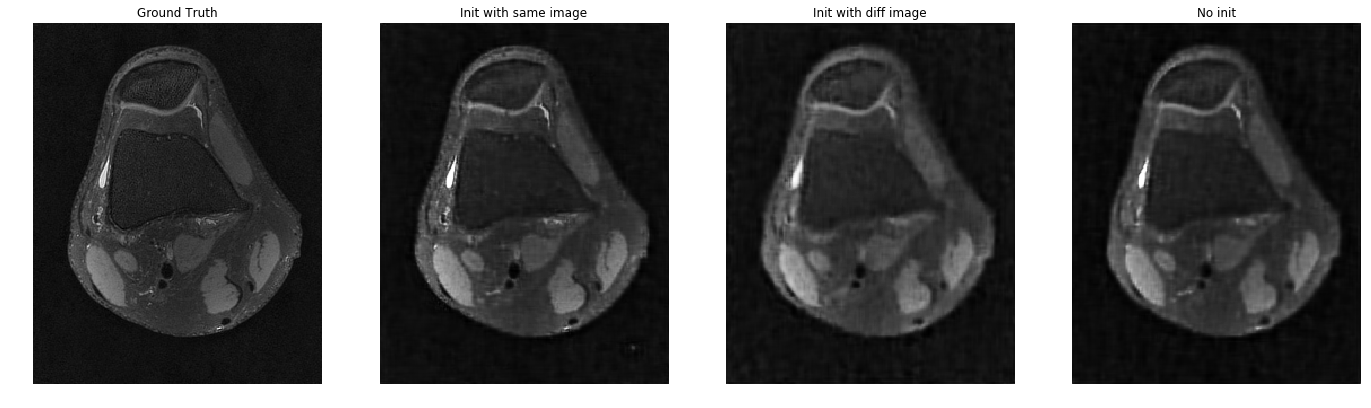

L1 errors:  [0.04710152872267449, 0.05494978417905255, 0.05167933481336321]
L2 errors:  [0.0046962114671906105, 0.006263210171626799, 0.005445817845716371]


In [7]:
# compare init with same image, init with diff image, no init: L2 loss + jittering for recon 2x subs
# show image comparisons at same noise input, graph of error

all_results = np.load('../deep_prior_data/comparisons/diff_inits_L2.npy')
same_init = all_results[0]
diff_init = all_results[1]
no_init = all_results[2]
np.shape(same_init[0][0])
trials = 3
titles = ['Init with same image', 'Init with diff image', 'No init']
for i in range(trials): # did 3 different noise values
    curr_L1 = []
    curr_L2 = []
    plt.figure(figsize=(30,10))
    
    plt.subplot(151); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(orig_img[:, :, 0], cmap='gray')
    
    for j in range(3): # tested 3 diff options
        curr = all_results[j][i]
        best, ind = get_best_L2(curr[0], orig_img)
        plt.subplot(152 + j); plt.axis('off'); plt.title(titles[j]); plt.imshow(best[:, :, 0], cmap='gray')
        curr_L1.append(curr[1][0][ind])
        curr_L2.append(curr[1][1][ind])
    plt.show()
    print('L1 errors: ', curr_L1)
    print('L2 errors: ', curr_L2)

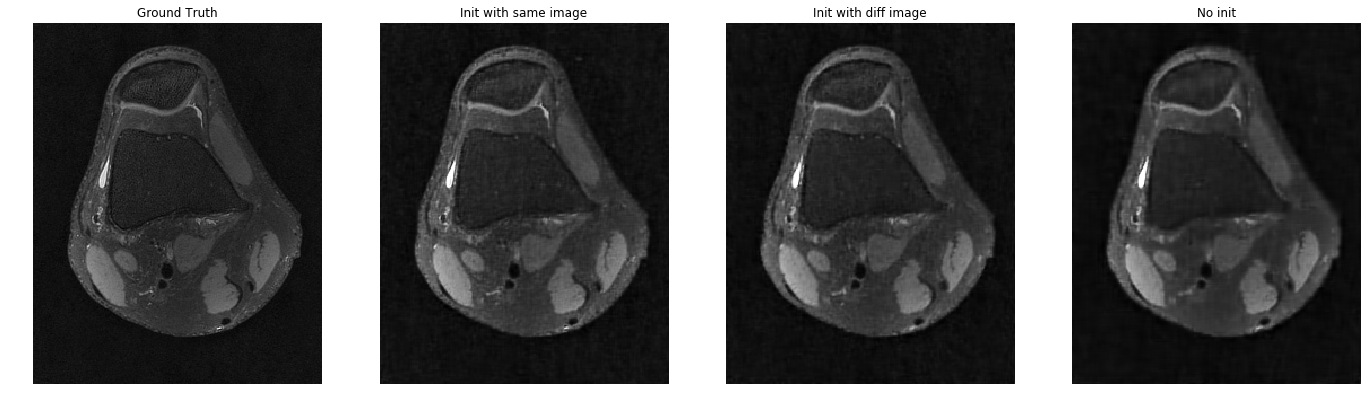

L1 errors:  [0.055998829217500726, 0.05580428000207952, 0.056013447895155145]
L2 errors:  [0.005823508996973767, 0.005982858967058218, 0.0061214708674197605]


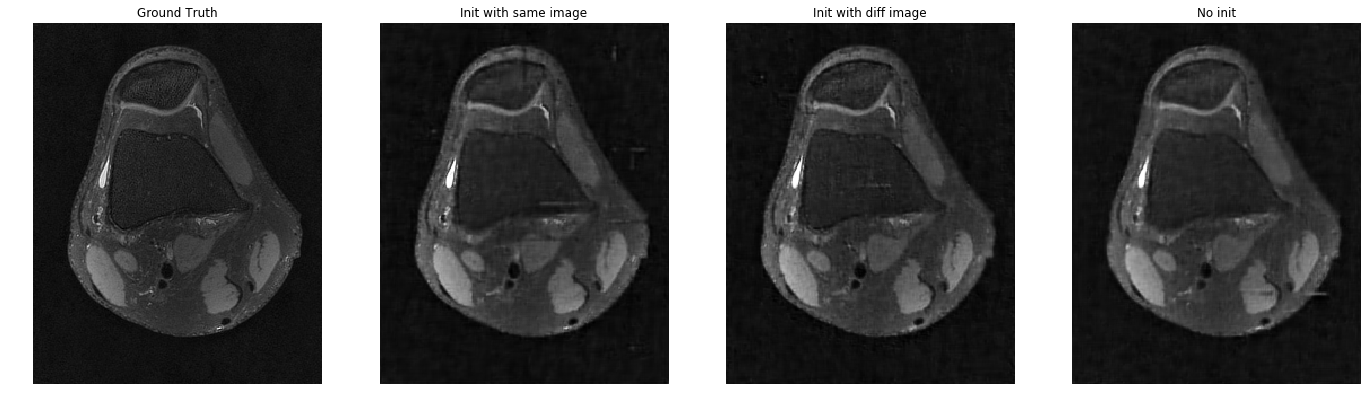

L1 errors:  [0.05393181426087599, 0.056139152461848064, 0.05297279386884143]
L2 errors:  [0.005713349215422891, 0.006027942944928328, 0.005652051960041334]


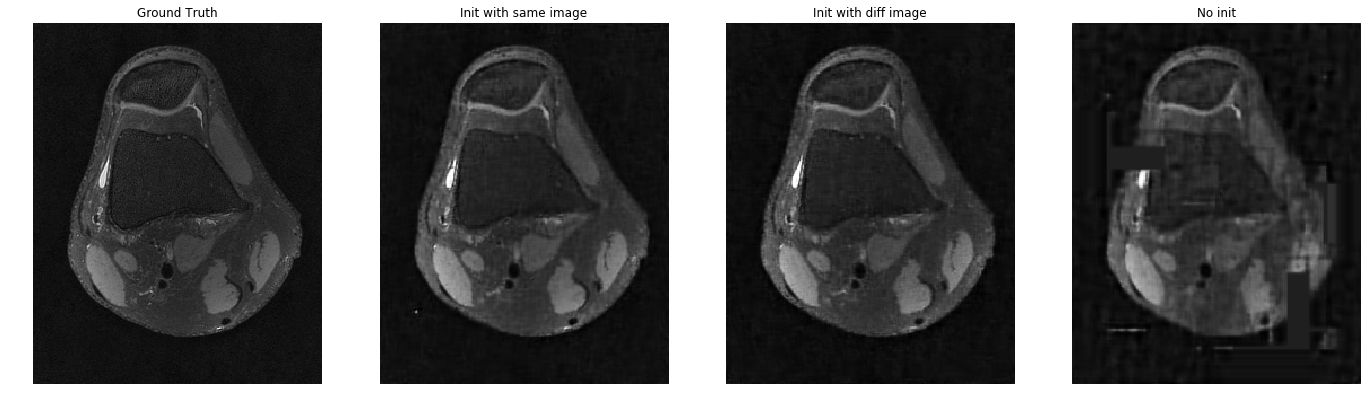

L1 errors:  [0.0532775587209135, 0.05468436291104297, 0.06552407392817743]
L2 errors:  [0.0056602165835799665, 0.005694186000860987, 0.009525472132927617]


In [8]:
# compare init with same image, init with diff image, no init: L1 loss + jittering for recon 2x subs
# show image comparisons at same noise input, graph of error

all_results = np.load('../deep_prior_data/comparisons/diff_inits_L1.npy')
same_init = all_results[0]
diff_init = all_results[1]
no_init = all_results[2]
np.shape(same_init[0][0])
trials = 3
titles = ['Init with same image', 'Init with diff image', 'No init']
for i in range(trials): # did 3 different noise values
    curr_L1 = []
    curr_L2 = []
    plt.figure(figsize=(30,10))
    plt.subplot(151); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(orig_img[:, :, 0], cmap='gray')
    
    for j in range(3): # tested 3 diff options
        curr = all_results[j][i]
        best, ind = get_best_L2(curr[0], orig_img)
        plt.subplot(152 + j); plt.axis('off'); plt.title(titles[j]); plt.imshow(best[:, :, 0], cmap='gray')
        curr_L1.append(curr[1][0][ind])
        curr_L2.append(curr[1][1][ind])
    plt.show()
    print('L1 errors: ', curr_L1)
    print('L2 errors: ', curr_L2)

In [4]:
# compare best init from ^ with L1, L2, L_inf loss + jittering

In [5]:
# compare best init + loss from ^ with 2x vs 4x vs 6x subsample

In [13]:
# compare best setup from ^ on multiple images

IndexError: list index out of range

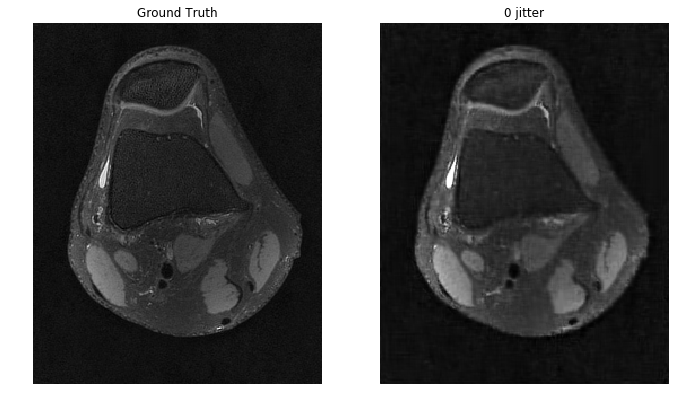

In [4]:
# compare jittering schedule for same image init, L2 loss
# 0 jitter, 0.1, 0.01, 0.1/0.01 decay

all_results = np.load('../deep_prior_data/comparisons/diff_jitters_L2.npy')
same_init = all_results[0]
diff_init = all_results[1]
no_init = all_results[2]
np.shape(same_init[0][0])
trials = 1
titles = ['0 jitter', '0.1 * U(-1, 1)', '0.01 * U(-1, 1)', ]
for i in range(trials): # did 3 different noise values
    curr_L1 = []
    curr_L2 = []
    plt.figure(figsize=(30,10))
    plt.subplot(151); plt.axis('off'); plt.title('Ground Truth'); plt.imshow(orig_img[:, :, 0], cmap='gray')
    
    for j in range(4): # tested 3 diff options
        curr = all_results[j][i]
        best, ind = get_best_L2(curr[0], orig_img)
        plt.subplot(152 + j); plt.axis('off'); plt.title(titles[j]); plt.imshow(best[:, :, 0], cmap='gray')
        curr_L1.append(curr[1][0][ind])
        curr_L2.append(curr[1][1][ind])
    plt.show()
    print('L1 errors: ', curr_L1)
    print('L2 errors: ', curr_L2)